In [1]:
LEARNING_RATE = 0.001
EPOCH_VALUE = 300

In [2]:
import pandas as pd

file = pd.read_csv('./diabetes.csv')
df = pd.DataFrame(file)
df

/var/folders/my/rbl5q7yd7pxb2yk9_qjc7mjr0000gn/T/ipykernel_9914/122538871.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print('Total data:', df.shape[0])
print('Total features:', df.shape[1])

Total data: 768
Total features: 9


Text(0.5, 1.0, 'persebaran seluruh data berdasarkan umur')

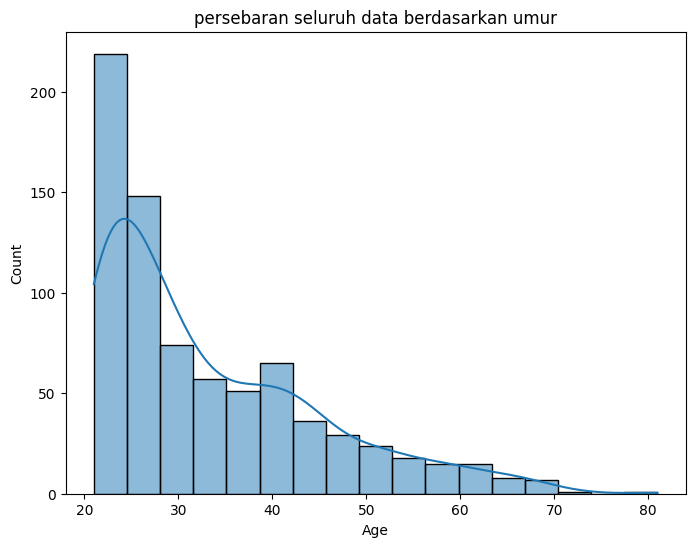

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True)  # Basic displot
plt.title('persebaran seluruh data berdasarkan umur')

<Axes: title={'center': 'persebaran data yang terkena diabetes berdasarkan umur'}, xlabel='Age', ylabel='Count'>

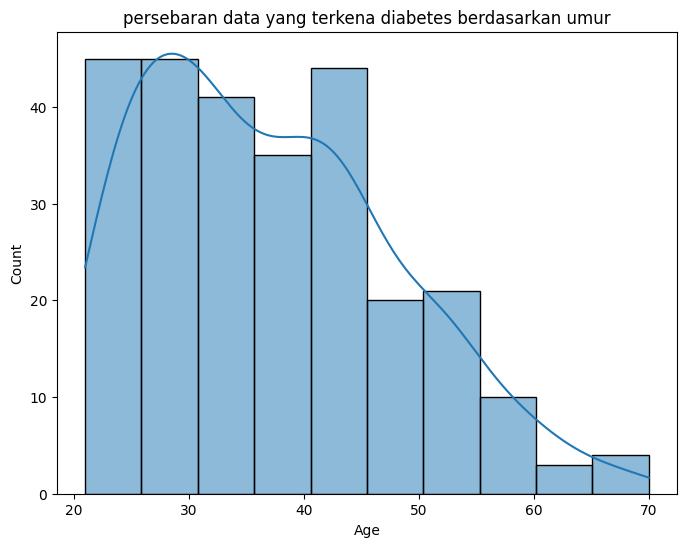

In [7]:
plt.figure(figsize=(8,6))
plt.title('persebaran data yang terkena diabetes berdasarkan umur')
sns.histplot(df[df['Outcome'] == 1]['Age'], kde=True)  # Basic displot


In [8]:

features = df.drop(columns=('Outcome'), axis=1)
features


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
labels = df['Outcome']
labels

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
# Train test split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer
model.add(Dense(6, activation='relu')) # 3rd hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

Kode di atas mendefinisikan arsitektur sebuah jaringan saraf tiruan (neural network) menggunakan Keras. Berikut penjelasan dengan bahasa yang lebih mudah dipahami:

- model = Sequential(): Membuat model neural network menggunakan model Sequential. Model Sequential memungkinkan kita untuk membuat model secara berurutan, satu layer setelah layer lainnya.

- model.add(Dense(12, input_dim=8, activation='relu')): Menambahkan layer pertama (input layer + hidden layer pertama) dengan 12 neuron. Parameter input_dim=8 menunjukkan bahwa input ke layer ini memiliki 8 fitur. Aktivasi 'relu' (Rectified Linear Activation) digunakan untuk mengaktifkan neuron.

- model.add(Dense(8, activation='relu')): Menambahkan hidden layer kedua dengan 8 neuron. Karena tidak ada parameter input_dim, layer ini akan mengambil input dari output layer sebelumnya (12 neuron).

- model.add(Dense(6, activation='relu')): Menambahkan hidden layer ketiga dengan 6 neuron. Sama seperti sebelumnya, layer ini mengambil input dari output layer sebelumnya (8 neuron).

- model.add(Dense(1, activation='sigmoid')): Menambahkan output layer dengan 1 neuron. Aktivasi 'sigmoid' digunakan karena kita ingin melakukan klasifikasi biner (1 atau 0) di mana output yang dihasilkan akan berada dalam rentang 0 hingga 1 (representasi probabilitas).

Dengan demikian, arsitektur neural network ini memiliki 1 input layer, 3 hidden layers, dan 1 output layer. Jumlah neuron pada setiap layer dan jenis aktivasi yang digunakan dapat disesuaikan dengan kebutuhan dan karakteristik dari data yang digunakan.

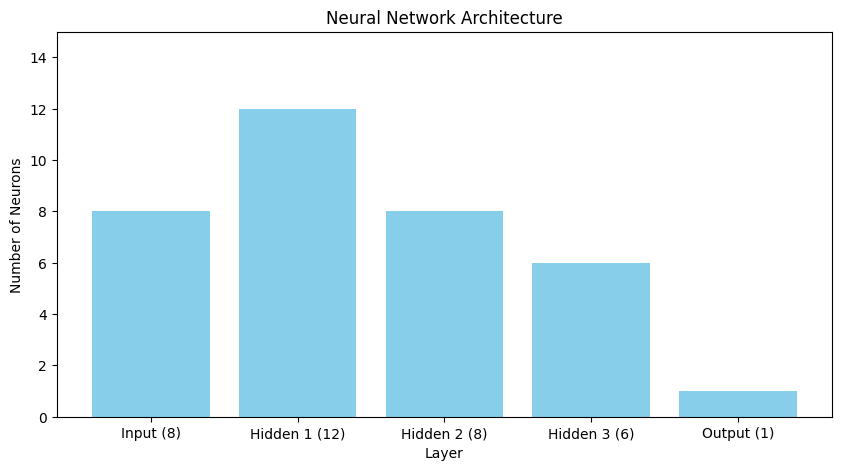

In [12]:
import matplotlib.pyplot as plt

# Define the layers
layers = ['Input (8)', 'Hidden 1 (12)', 'Hidden 2 (8)', 'Hidden 3 (6)', 'Output (1)']
layer_sizes = [8, 12, 8, 6, 1]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(layers, layer_sizes, color='skyblue')
plt.xlabel('Layer')
plt.ylabel('Number of Neurons')
plt.title('Neural Network Architecture')
plt.ylim(0, 15)  # Set y-axis limit
plt.show()

In [13]:
from keras.optimizers import Adam

adam = Adam(learning_rate=LEARNING_RATE)

In [14]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(X_train, y_train,
          , batch_size=8)

Epoch 1/300
77/77 [==============================] - 0s 679us/step - loss: 1.3836 - accuracy: 0.6547
Epoch 2/300
77/77 [==============================] - 0s 516us/step - loss: 0.8004 - accuracy: 0.6531
Epoch 3/300
77/77 [==============================] - 0s 479us/step - loss: 0.6518 - accuracy: 0.6726
Epoch 4/300
77/77 [==============================] - 0s 479us/step - loss: 0.6307 - accuracy: 0.6629
Epoch 5/300
77/77 [==============================] - 0s 477us/step - loss: 0.6174 - accuracy: 0.6873
Epoch 6/300
77/77 [==============================] - 0s 475us/step - loss: 0.6068 - accuracy: 0.6840
Epoch 7/300
77/77 [==============================] - 0s 479us/step - loss: 0.6037 - accuracy: 0.6906
Epoch 8/300
77/77 [==============================] - 0s 486us/step - loss: 0.6060 - accuracy: 0.6840
Epoch 9/300
77/77 [==============================] - 0s 477us/step - loss: 0.5997 - accuracy: 0.7003
Epoch 10/300
77/77 [==============================] - 0s 469us/step - loss: 0.5977 - accura

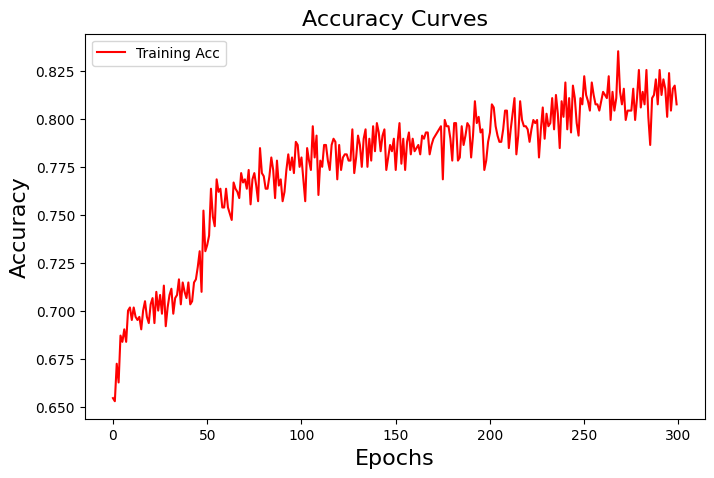

In [17]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [18]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 74.03%


In [19]:
predictions = model.predict(X_test)
predictions = predictions.flatten()  # Flatten the array
predictions = [int(round(x)) for x in predictions]  # Convert to 1 or 0

print(predictions)
print(list(y_test))

5/5 [==============================] - 0s 959us/step
[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [20]:
# Predict probabilities
probabilities = model.predict(X_test)

# Convert probabilities to binary predictions
predictions = (probabilities > 0.5).astype(int)

print(predictions.flatten())

5/5 [==============================] - 0s 721us/step
[1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0]


---

### arsitektur "narrow and shallow" 

menggunakan jumlah layer dan neuron yang lebih sedikit. 

Misalnya, dapat menggunakan satu atau dua hidden layer dengan sedikit neuron dalam setiap layer.

In [21]:
# Create a Sequential model
modelNarrowAndShallow = Sequential()

# Add a narrow and shallow hidden layer
modelNarrowAndShallow.add(Dense(8, input_dim=8, activation='relu'))

# Add the output layer
modelNarrowAndShallow.add(Dense(1, activation='sigmoid'))


# Compile the model
adam = Adam(learning_rate=LEARNING_RATE)
modelNarrowAndShallow.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Print the model summary
modelNarrowAndShallow.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
modelNarrowAndShallow.fit(X_train, y_train, epoch=EPOCH_VALUE, batch_size=8)

Epoch 1/300


77/77 [==============================] - 0s 611us/step - loss: 5.1054 - accuracy: 0.6515
Epoch 2/300
77/77 [==============================] - 0s 472us/step - loss: 4.1110 - accuracy: 0.6401
Epoch 3/300
77/77 [==============================] - 0s 459us/step - loss: 3.5558 - accuracy: 0.6629
Epoch 4/300
77/77 [==============================] - 0s 434us/step - loss: 3.0770 - accuracy: 0.6645
Epoch 5/300
77/77 [==============================] - 0s 425us/step - loss: 2.6291 - accuracy: 0.6840
Epoch 6/300
77/77 [==============================] - 0s 497us/step - loss: 2.3722 - accuracy: 0.6710
Epoch 7/300
77/77 [==============================] - 0s 446us/step - loss: 2.1172 - accuracy: 0.6661
Epoch 8/300
77/77 [==============================] - 0s 438us/step - loss: 1.8786 - accuracy: 0.6808
Epoch 9/300
77/77 [==============================] - 0s 445us/step - loss: 1.7408 - accuracy: 0.6580
Epoch 10/300
77/77 [==============================] - 0s 434us/step - loss: 1.5399 - accuracy: 0.6726
E

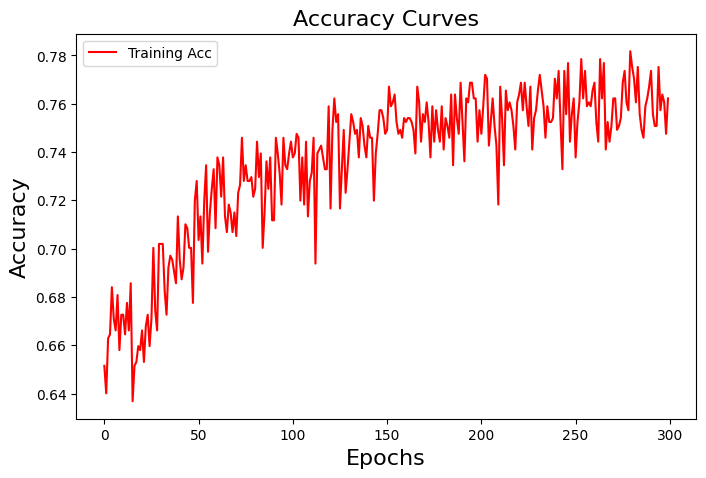

In [23]:
plt.figure(figsize=[8,5])
plt.plot(modelNarrowAndShallow.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [45]:
# evaluate the keras model
_, accuracy_modelNarrowAndShallow = modelNarrowAndShallow.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy-NarrowAndShallow: {accuracy_modelNarrowAndShallow*100:.2f}%')


Accuracy-NarrowAndShallow: 74.03%


### arsitektur "narrow and wide" pada model.

menggunakan lebih sedikit layer tetapi dengan lebih banyak  neuron dalam setiap layer. 

In [25]:
# Create a Sequential model
modelNarrowAndWide = Sequential()

# Add a narrow and wide hidden layer
modelNarrowAndWide.add(Dense(64, input_dim=8, activation='relu'))

# Add the output layer
modelNarrowAndWide.add(Dense(1, activation='sigmoid'))

# Compile the modelNarrowAndWide
adam = Adam(learning_rate=LEARNING_RATE)
modelNarrowAndWide.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Print the modelNarrowAndWide summary
modelNarrowAndWide.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
modelNarrowAndWide.fit(X_train, y_train, epoch=EPOCH_VALUE, batch_size=8)

Epoch 1/300
77/77 [==============================] - 0s 562us/step - loss: 2.5617 - accuracy: 0.5912
Epoch 2/300
77/77 [==============================] - 0s 454us/step - loss: 1.2334 - accuracy: 0.6189
Epoch 3/300
77/77 [==============================] - 0s 442us/step - loss: 0.7672 - accuracy: 0.6645
Epoch 4/300
77/77 [==============================] - 0s 416us/step - loss: 0.7005 - accuracy: 0.6824
Epoch 5/300
77/77 [==============================] - 0s 546us/step - loss: 0.6526 - accuracy: 0.6824
Epoch 6/300
77/77 [==============================] - 0s 596us/step - loss: 0.6593 - accuracy: 0.6889
Epoch 7/300
77/77 [==============================] - 0s 449us/step - loss: 0.6941 - accuracy: 0.6873
Epoch 8/300
77/77 [==============================] - 0s 448us/step - loss: 0.6672 - accuracy: 0.6906
Epoch 9/300
77/77 [==============================] - 0s 431us/step - loss: 0.7248 - accuracy: 0.6938
Epoch 10/300
77/77 [==============================] - 0s 447us/step - loss: 0.6344 - accura

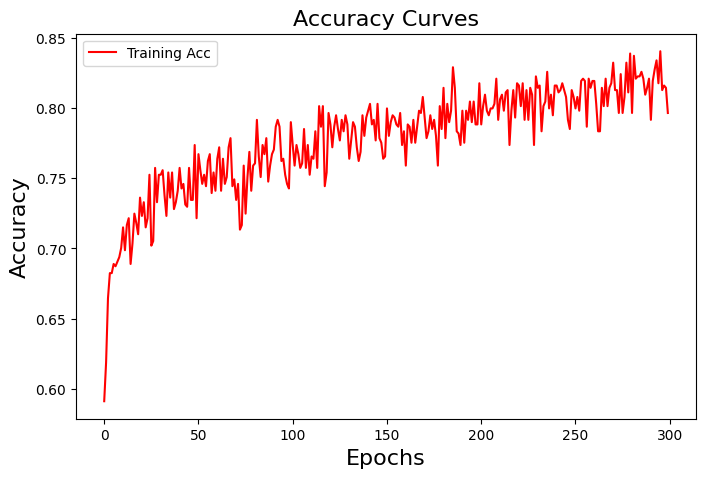

In [27]:
plt.figure(figsize=[8,5])
plt.plot(modelNarrowAndWide.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [46]:
# evaluate the keras model
_, accuracy_modelNarrowAndWide = modelNarrowAndWide.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy-NarrowAndWide: {accuracy_modelNarrowAndWide*100:.2f}%')


Accuracy-NarrowAndWide: 74.03%


### arsitektur "deep and shallow"

Anda dapat menggunakan lebih banyak layer tetapi dengan sedikit neuron dalam setiap layer. 

In [29]:
# Create a Sequential model
modelDeepAndShallow = Sequential()

# Add a deep and shallow hidden layer (12 neurons)
modelDeepAndShallow.add(Dense(12, input_dim=8, activation='relu'))

# Add a deep and shallow hidden layer (8 neurons)
modelDeepAndShallow.add(Dense(8, activation='relu'))

# Add a deep and shallow hidden layer (6 neurons)
modelDeepAndShallow.add(Dense(6, activation='relu'))

# Add the output layer
modelDeepAndShallow.add(Dense(1, activation='sigmoid'))

# Compile the modelDeepAndShallow
adam = Adam(learning_rate=LEARNING_RATE)
modelDeepAndShallow.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
modelDeepAndShallow.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                108       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
modelDeepAndShallow.fit(X_train, y_train, epoch=EPOCH_VALUE, batch_size=8)

Epoch 1/300
77/77 [==============================] - 0s 655us/step - loss: 4.0025 - accuracy: 0.5765
Epoch 2/300
77/77 [==============================] - 0s 536us/step - loss: 0.7519 - accuracy: 0.4495
Epoch 3/300
77/77 [==============================] - 0s 518us/step - loss: 0.7151 - accuracy: 0.5228
Epoch 4/300
77/77 [==============================] - 0s 539us/step - loss: 0.6991 - accuracy: 0.6498
Epoch 5/300
77/77 [==============================] - 0s 492us/step - loss: 0.6831 - accuracy: 0.6498
Epoch 6/300
77/77 [==============================] - 0s 497us/step - loss: 0.6679 - accuracy: 0.6498
Epoch 7/300
77/77 [==============================] - 0s 495us/step - loss: 0.6588 - accuracy: 0.6498
Epoch 8/300
77/77 [==============================] - 0s 492us/step - loss: 0.6503 - accuracy: 0.6612
Epoch 9/300
77/77 [==============================] - 0s 489us/step - loss: 0.6413 - accuracy: 0.6661
Epoch 10/300
77/77 [==============================] - 0s 488us/step - loss: 0.6351 - accura

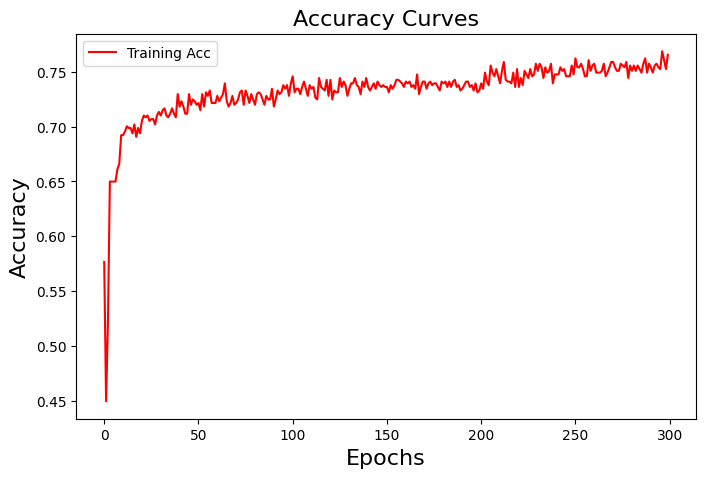

In [31]:
plt.figure(figsize=[8,5])
plt.plot(modelDeepAndShallow.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [47]:
# evaluate the keras model
_, accuracy_modelDeepAndShallow = modelDeepAndShallow.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy-DeepAndShallow: {accuracy_modelDeepAndShallow*100:.2f}%')


Accuracy-DeepAndShallow: 68.83%


### arsitektur "deep and wide" pada model

menggunakan lebih banyak layer dan lebih banyak neuron dalam setiap layer. 

In [33]:
# Create a Sequential model
modelDeepAndWide = Sequential()

# Add a deep and wide hidden layer (64 neurons)
modelDeepAndWide.add(Dense(64, input_dim=8, activation='relu'))

# Add a deep and wide hidden layer (32 neurons)
modelDeepAndWide.add(Dense(32, activation='relu'))

# Add a deep and wide hidden layer (16 neurons)
modelDeepAndWide.add(Dense(16, activation='relu'))

# Add the output layer
modelDeepAndWide.add(Dense(1, activation='sigmoid'))

# Compile the modelDeepAndWide
adam = Adam(learning_rate=LEARNING_RATE)
modelDeepAndWide.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Print the modelDeepAndWide summary
modelDeepAndWide.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
modelDeepAndWide.fit(X_train, y_train, epoch=EPOCH_VALUE, batch_size=8)


Epoch 1/300
77/77 [==============================] - 0s 709us/step - loss: 3.8247 - accuracy: 0.5179
Epoch 2/300
77/77 [==============================] - 0s 558us/step - loss: 0.8917 - accuracy: 0.6466
Epoch 3/300
77/77 [==============================] - 0s 537us/step - loss: 0.8884 - accuracy: 0.6254
Epoch 4/300
77/77 [==============================] - 0s 545us/step - loss: 0.8090 - accuracy: 0.6580
Epoch 5/300
77/77 [==============================] - 0s 547us/step - loss: 0.7299 - accuracy: 0.6596
Epoch 6/300
77/77 [==============================] - 0s 567us/step - loss: 0.8211 - accuracy: 0.6498
Epoch 7/300
77/77 [==============================] - 0s 551us/step - loss: 0.7458 - accuracy: 0.6498
Epoch 8/300
77/77 [==============================] - 0s 570us/step - loss: 0.6724 - accuracy: 0.6824
Epoch 9/300
77/77 [==============================] - 0s 560us/step - loss: 0.6356 - accuracy: 0.6971
Epoch 10/300
77/77 [==============================] - 0s 596us/step - loss: 0.6696 - accura

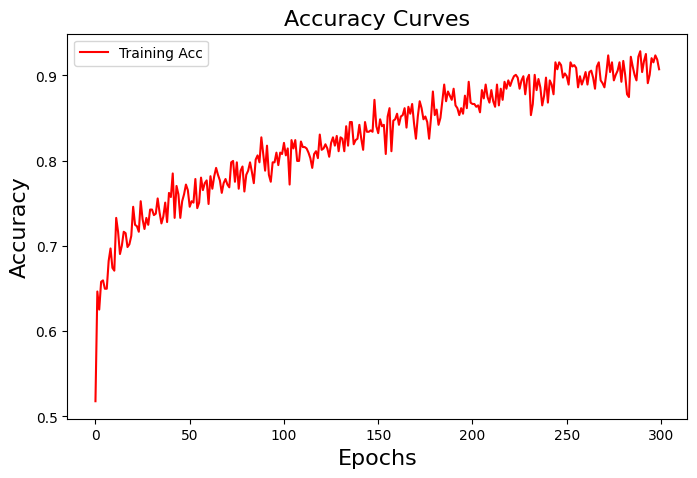

In [35]:
plt.figure(figsize=[8,5])
plt.plot(modelDeepAndWide.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [43]:
# evaluate the keras model
_, accuracy_modelDeepAndWide = modelDeepAndWide.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy-DeepAndWide: {accuracy_modelDeepAndWide*100:.2f}%')


Accuracy-DeepAndWide: 58.44%


Pemilihan arsitektur neural network tergantung pada dataset, kompleksitas masalah, dan sumber daya yang tersedia. Berikut adalah panduan umum untuk memilih arsitektur yang sesuai:

- Narrow and Shallow: Cocok untuk dataset kecil atau sederhana. Biasanya digunakan untuk masalah yang relatif mudah dipelajari oleh model.

- Narrow and Wide: Cocok untuk dataset yang lebih besar atau lebih kompleks. Dengan memiliki lebih banyak neuron dalam setiap layer, model dapat mempelajari representasi-fitur yang lebih kompleks.

- Deep and Shallow: Cocok untuk dataset yang lebih besar atau lebih kompleks. Dengan memiliki banyak layer, model dapat mempelajari hierarki fitur yang lebih dalam dan kompleks.

- Deep and Wide: Cocok untuk dataset yang sangat besar atau sangat kompleks. Dengan memiliki banyak layer dan banyak neuron dalam setiap layer, model dapat mempelajari representasi-fitur yang sangat kompleks.

Jadi, pemilihan arsitektur tergantung pada karakteristik dataset dan kompleksitas masalah. 

In [49]:
architectures = pd.DataFrame({
  'Name': [
    'Follow The Tutorial',
    'Narrow and Shallow',
    'Narrow and Wide',
    'Deep and shallow',
    'Deep and wide'
  ],
  'Value': [
    accuracy,
    accuracy_modelNarrowAndShallow,
    accuracy_modelNarrowAndWide,
    accuracy_modelDeepAndShallow,
    accuracy_modelDeepAndWide
  ]
})

architectures

,Name,Value
0,Follow The Tutorial,0.688312
1,Narrow and Shallow,0.740260
2,Narrow and Wide,0.740260
3,Deep and shallow,0.688312
4,Deep and wide,0.584416
